# Lab 1

# STRAIGHT TO ACTION!

Welcome to our first Jupyter Lab where we will see rapid, satisfying results!

I will leave with you to try out leading LLMs through their Chat Interfaces

Together, we will call them using their APIs

Please see the README for instructions on setting this up and getting your API key

# If this is your first time in a Notebook..

Welcome to the world of Data Science experimentation. Warning: Jupyter Notebooks are very addictive and you may find it hard to go back to IDEs afterwards!!

Simply click in each cell with code and press `Shift + Enter` to execute the code and print the results.

There's a notebook called "Guide to Jupyter" in the parent directory that will give you a handy tutorial on all things Jupyter Lab.

## Part 1: For you to experiment: Frontier models through their Chat UI

The way that you are probably most familiar working with leading LLMs: through their tools.  
Some questions you can try asking them:
1. What kinds of business problem are most suitable for an LLM solution?
2. How many words are there in your answer to this prompt?
3. How many rainbows does it take to jump from Hawaii to seventeen?
4. What does it feel like to be jealous?

**ChatGPT** from OpenAI needs no introduction.

Let's try some hard questions, and use the new o1 model as well as GPT-4o. Also try GPT-4o with canvas.

https://chatgpt.com/?model=gpt-4o

**Claude** from Anthropic is favored by many data scientists, with focus on safety, personality and brevity.

https://claude.ai/new

**Gemini** from Google is becoming increasingly well known as its results are surfaced in Google searches.

https://gemini.google.com/app

**Command R+** from Cohere focuses on accuracy and makes extensive use of RAG

https://coral.cohere.com/

**Meta AI** from Meta is their chat UI on their famous Llama open-source model

https://www.meta.ai/

**Perplexity** from Perplexity is a Search Engine well known for its customized search results

https://www.perplexity.ai/

**LeChat** from Mistral is the Web UI from the French AI powerhouse

https://chat.mistral.ai/

**DeepSeek** from DeepSeek AI needs no introduction! Deepseek-R1 is the Reasoning model, V3 is their Chat model.

https://chat.deepseek.com/


## Conclusions and Takeways from exploring the Chat UIs

- These models are astonishing
- Reasoning vs Chat models - different capabilities and use cases. Reasoning better for research but not for conversation.
- Price is highly competitive

You'll find cost and other comparisons at this very useful leaderboard:

https://www.vellum.ai/llm-leaderboard

## PART 2: Calling Frontier Models through APIs

## Setting up your keys

If you haven't done so already, you'll need to create API keys from OpenAI, Anthropic and Google, and also DeepSeek and Groq if you wish.

For OpenAI, visit https://openai.com/api/  
For Anthropic, visit https://console.anthropic.com/  
For Google, visit https://ai.google.dev/gemini-api  

When you get your API keys, you need to set them as environment variables.

EITHER (recommended) create a file called `.env` in this project root directory, and set your keys there:

```
OPENAI_API_KEY=xxxx
ANTHROPIC_API_KEY=xxxx
GOOGLE_API_KEY=xxxx
DEEPSEEK_API_KEY=xxxx
GROQ_API_KEY=xxxx
```

OR enter the keys directly in the cells below.

## Two purposes of these APIs:

1. Illustrate how to use the APIs and switch between LLMs
2. Experiment with some LLMs and understand their strengths and weaknesses

In [1]:
# imports

import os
import json
import requests
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Markdown, display, update_display

In [2]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')
groq_api_key = os.getenv('GROQ_API_KEY')
grok_api_key = os.getenv('GROK_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set (and this is optional)")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

if deepseek_api_key:
    print(f"DeepSeek API Key exists and begins {deepseek_api_key[:3]}")
else:
    print("DeepSeek API Key not set (and this is optional)")

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:4]}")
else:
    print("Groq API Key not set (and this is optional)")

if grok_api_key:
    print(f"Grok API Key exists and begins {grok_api_key[:4]}")
else:
    print("Grok API Key not set (and this is optional)")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key exists and begins sk-ant-
Google API Key exists and begins AI
DeepSeek API Key exists and begins sk-
Groq API Key exists and begins gsk_
Grok API Key exists and begins xai-


## Connecting to Python Client libraries

We call Cloud APIs by making REST calls to an HTTP endpoint, passing in our keys.

For convenience, the labs like OpenAI have provided lightweight python client libraries that make the HTTP calls for us.

In [3]:
# Connect to OpenAI client library
# A thin wrappes around calls to REST endpoints

openai = OpenAI()

# We can use the OpenAI python client for all the others, because everyone has produced endpoints compatible with OpenAI
# And OpenAI allows you to change the base_url

anthropic_url = "https://api.anthropic.com/v1/"
gemini_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
deepseek_url = "https://api.deepseek.com"
groq_url = "https://api.groq.com/openai/v1"
grok_url = "https://api.x.ai/v1"

anthropic = OpenAI(api_key=anthropic_api_key, base_url=anthropic_url)
gemini = OpenAI(api_key=google_api_key, base_url=gemini_url)
deepseek = OpenAI(api_key=deepseek_api_key, base_url=deepseek_url)
groq = OpenAI(api_key=groq_api_key, base_url=groq_url)
grok = OpenAI(api_key=grok_api_key, base_url=grok_url)

## Asking LLMs a hard question that will put them to the test and illustrate their power

We will come up with a challenging question to test out model performance with language and nuance.

### What information is included in the API

Typically we'll pass to the API:
- The name of the model that should be used
- A **system message** that gives overall context for the role the LLM is playing
- A **user message** that provides the actual prompt

There are other parameters that can be used, including **temperature** which is typically between 0 and 1; higher for more random output; lower for more focused and deterministic.

### The standard format of messages with an LLM, first used by OpenAI in its API and now adopted more widely

Conversations use this format:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```


In [4]:
# The hardest question I could come up with

system_message = "You are able to explain abstract concepts clearly and concisely, with powerful analogies"

user_prompt = "In 1 sentence, describe a rainbow to someone who's never been able to see. \
Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. \
Then in 1 sentence, find a connection between rainbows and imaginary numbers. \
Then end by stating how many words are in your answer."

In [5]:
challenge = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

In [6]:
models = []
answers = []

def record(model, reply):
    display(Markdown(f"### Response from {model}:\n\n{reply}\n\n### Actual word count: {len(reply.split())}"))
    models.append(model)
    answers.append(reply)

In [7]:
# GPT-4.1-mini

model_name = "gpt-4.1-mini"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-mini:

A rainbow is like a gentle arch of colors painted across the sky where sunlight meets rain, blending warmth and coolness into a fleeting, vibrant bridge. The imaginary number i is a special kind of number that, unlike normal numbers, represents a way to turn around completely in math, helping us solve puzzles that regular numbers can't. Both a rainbow and the imaginary number i reveal hidden dimensions—one in nature’s light and the other in the language of math—showing us beauty and solutions beyond what we usually see or count. This answer contains 61 words.

### Actual word count: 95

In [8]:
# GPT-4.1-nano

model_name = "gpt-4.1-nano"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1-nano:

A rainbow is like a bridge of colorful light that appears after rain, connecting the sky and the earth with a gentle hue; imaginary number i is like a secret ingredient in math that allows us to solve problems involving square roots of negative numbers, which wouldn't be possible otherwise; both rainbows and imaginary numbers are examples of phenomena that extend our understanding beyond the obvious—rainbows with colors of the sky and imaginary numbers with new dimensions of calculation.  
(Word count: 91)

### Actual word count: 82

In [9]:
# GPT-4.1

model_name = "gpt-4.1"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gpt-4.1:

A rainbow is like a silent song created when sunlight dances with rain, painting an invisible arc of shifting warmth and coolness across the sky.  
The imaginary number i is like a magic key that opens a door to a shadow world where ordinary counting and measuring no longer apply.  
Both rainbows and imaginary numbers reveal hidden layers of reality—appearing unrealistic or unreachable, yet arising naturally from the world’s deeper patterns.  
There are 77 words in my answer.

### Actual word count: 78

In [10]:
# o1
# o1 is a "reasoning" model that has been trained to think through it's answer before it replies..

model_name = "o1"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from o1:

A rainbow is like a softly whispered chord that combines countless subtle notes into one breathtaking harmony after a storm.  
Imaginary number i is like an invisible axis that twists math into a new dimension, letting us explore solutions we cannot reach on the ordinary number line.  
Rainbows and imaginary numbers both reveal hidden realms—rainbows show the colors in light we usually overlook, while imaginary numbers expose mysterious dimensions beyond our everyday intuition.  
There are exactly 80 words in total.  

### Actual word count: 80

In [11]:
# o3

model_name = "o3"

response = openai.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from o3:

A rainbow is like a gentle, ascending scale of musical notes after a storm, each note a different temperature of sunlight brushing your skin, forming an arch of sensations that promise calm and wonder.  
The imaginary number i is like an impossible direction you can travel on a map—one step that turns you sideways out of ordinary space without moving you north, south, east, or west.  
Both rainbows and the number i appear when we extend our usual senses—sight in the rain’s light or counting on the number line—into hidden dimensions where nature still follows beautiful patterns.  
There are one hundred and seven words in this answer.

### Actual word count: 107

In [12]:
# Claude 4.0 Sonnet
# API needs system message provided separately from user prompt
# Also adding max_tokens

model_name = "claude-sonnet-4-20250514"

response = anthropic.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from claude-sonnet-4-20250514:

A rainbow is like nature's gentle musical scale made visible - bands of different colored light that each feel as distinct as different musical notes, arcing gracefully across the sky after rain. The imaginary number i is like a magical mathematical compass that points in a completely new direction that doesn't exist on our normal number line, allowing mathematicians to solve problems that would otherwise be impossible. Both rainbows and imaginary numbers reveal hidden dimensions of reality - rainbows show us the invisible spectrum of light that surrounds us, while i unveils an invisible mathematical dimension that makes the impossible possible. This answer contains 87 words.

### Actual word count: 106

In [13]:
# Gemini 2.5 Flash

model_name = "gemini-2.5-flash-preview-05-20"

response = gemini.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gemini-2.5-flash-preview-05-20:

It's like a fleeting, beautiful symphony of light that emerges across the sky after rain, a silent promise of clarity. It's a mathematical concept that lets us explore problems and ideas lying *beyond* the simple straight line of ordinary numbers, opening up new dimensions of understanding. Just as rainbows reveal the hidden spectrum within seemingly plain white light, imaginary numbers unlock unseen, rotational dimensions within seemingly straightforward mathematical problems.
71 words.

### Actual word count: 71

In [ ]:
# Gemini 2.5 Pro

model_name = "gemini-2.5-pro-preview-06-05"

response = gemini.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

In [14]:
# Deepseek-V3

model_name = "deepseek-chat"

response = deepseek.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from deepseek-chat:

A rainbow is like nature’s melody painted across the sky after rain, where invisible light bends into visible colors. The imaginary number *i* is a mathematical "what if" that answers the question, "What squared equals -1?" Both rainbows and *i* reveal hidden layers of reality—one in light, the other in numbers. (50 words.)

### Actual word count: 53

In [15]:
# Deepseek-R1
# This takes too long! It can get stuck in a loop 

model_name = "deepseek-reasoner"

response = deepseek.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from deepseek-reasoner:

A rainbow is sunlight split by raindrops into a gentle arch of warm reds fading to cool violets, like feeling nature's ordered spectrum.  
Imaginary *i* is a conceptual turn sideways from regular numbers, like needing a left turn when you only know forward and backward.  
Both reveal hidden dimensions—rainbows by bending light, imaginary numbers by bending numerical perspective.  
This answer contains 52 words.

### Actual word count: 63

In [16]:
# Groq - llama-3.3-70b-versatile

model_name = "llama-3.3-70b-versatile"

response = groq.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from llama-3.3-70b-versatile:

A rainbow is like a symphony of vibrations that resonate through the air, with different notes of color blending together in a majestic harmony that can be felt and imagined, even if not seen.
The imaginary number i is like a magical key that unlocks a hidden door in mathematics, allowing numbers to rotate and transform in unexpected ways, much like a masterful conjurer weaving a spell of innovation.
Just as a rainbow's colors blend and merge in a beautiful spectrum, the imaginary number i blends and merges with real numbers to create a vibrant and complex mathematical landscape.
There are 96 words in my answer.

### Actual word count: 106

In [17]:
# Groq - deepseek-r1-distill-llama-70b

model_name = "deepseek-r1-distill-llama-70b"

response = groq.chat.completions.create(model=model_name, messages=challenge)
reply = str(response.choices[0].message.content)

if '</think>' in reply:
    reply = reply.split('</think>')[1]

record(model_name, reply)

### Response from deepseek-r1-distill-llama-70b:



A rainbow is like a symphony of colors, each one a unique vibration of light that harmonizes to create breathtaking beauty.  
The imaginary number \(i\) is like a key that unlocks a new dimension, allowing math to "rotate" into unexplored territories.  
Both rainbows and imaginary numbers invite us to explore beyond what's immediately visible or tangible.  

This answer contains 50 words.

### Actual word count: 61

In [18]:
# Grok

model_name = "grok-3-latest"

response = grok.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from grok-3-latest:

A rainbow is a magical arc of vibrant warmth and coolness in the air, like a smile from the sky made of different feelings you can sense after rain. The imaginary number i is like an invisible friend for numbers, helping solve puzzles that seem impossible by existing outside the usual counting line. Just as a rainbow blends visible beauty with the unseen mist of rain, imaginary numbers merge the real with the unseen to create solutions beyond ordinary math. This answer contains 82 words.

### Actual word count: 85

# Now for Part 3

### Recap: first we tried Frontier LLMs through their chat interfaces

### Then we called Cloud APIs

### And now:

Now try the 3rd way to use LLMs - direct inference of Open Source Models running locally with Ollama¶
Visit the README for instructions on installing Ollama locally.

You can see some comparisons of Open Source models on the HuggingFace OpenLLM Leaderboard.

Ollama provides an OpenAI-style local endpoint, so this will look very similar to part 2!


In [ ]:
!ollama pull llama3.2
!ollama pull gemma3
!ollama pull qwen3
!ollama pull phi4
!ollama pull deepseek-r1

In [19]:
ollama_url = 'http://localhost:11434/v1'
ollama = OpenAI(base_url=ollama_url, api_key='ollama')

In [20]:
requests.get("http://localhost:11434").content

b'Ollama is running'

In [21]:
# llama3.2

model_name = "llama3.2"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from llama3.2:

Describing a rainbow: A rainbow is an extraordinary spectrum of colors that occur when sunlight passes through water droplets in the air, much like a canvas of vibrant emotions unfolding before our eyes.

Describing the imaginary number i: The imaginary number i is a mathematical concept that exists outside our conventional world of numbers and time, think of it as an infinite highway that branches out from the real world into a realm of endless possibility.

Connecting rainbows and imaginary numbers: Like how a rainbow's colors blend harmoniously to form its vibrant arc, the imaginary number i can be thought of as an invisible string that weaves together two seemingly disparate worlds – the real and the complex, with roots hidden in plain sight just like droplets on a windowsill refract light.

There are 46 words in my answer.

### Actual word count: 139

In [22]:
# gemma3

model_name = "gemma3"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from gemma3:

Okay, here we go:

**Rainbow:** Imagine a waterfall of light, each drop vibrating with a different color, creating a shimmering, curving band of hues you can *feel* through its beauty. 

**Imaginary Number *i***: Think of *i* as a secret staircase leading you beyond the familiar steps of real numbers – a path where adding it makes you move further into the unknown.

**Connection:** Just as a rainbow blends seemingly disparate colors into a unified whole, *i* seamlessly connects the known world of real numbers with the limitless possibilities of the complex plane.

**Word Count:** 85 words 


### Actual word count: 96

In [23]:
# qwen3

model_name = "qwen3"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

if '</think>' in reply:
    reply = reply.split("</think>")[1]

record(model_name, reply)

### Response from qwen3:



A rainbow is a shimmering arc of colors—red, orange, yellow, green, blue, indigo, violet—created when sunlight bends and reflects in raindrops, as if the sky momentarily spills a painted curtain across the heavens.  
The imaginary number *i* is a mathematical tool that lets us rotate numbers 90 degrees in a plane, turning ordinary numbers into keys to unlock new dimensions of problem-solving.  
Rainbows and imaginary numbers both arise from manipulating light or numbers beyond our immediate perception, revealing hidden patterns in nature and equations.  
**24 words**.

### Actual word count: 86

In [24]:
# phi4

model_name = "phi4"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

record(model_name, reply)

### Response from phi4:

A rainbow is like a symphony of colors gracefully arching across the sky after the sun kisses tiny droplets of water left from a storm, creating a spectrum that dances along nature's vast canvas.

The imaginary number \(i\) is akin to a fantastical key that unlocks directions and dimensions beyond those visible on plain paper, letting us solve puzzles in mathematics where regular numbers fall short.

Both rainbows and the imaginary unit \(i\) invite us into realms of beauty—and utility—beyond ordinary seeing or solving: one paints with light unseen in its full vibrancy until pieced together, while the other stretches our perception of numeric reality into complex and colorful new spaces to explore.

This answer contains 110 words.

### Actual word count: 118

In [25]:
# deepseek-r1

model_name = "deepseek-r1"

response = ollama.chat.completions.create(model=model_name, messages=challenge)
reply = response.choices[0].message.content

if '</think>' in reply:
    reply = reply.split("</think>")[1]

record(model_name, reply)

### Response from deepseek-r1:



"One can imagine a rainbow as a shimmering circle that appears after rain, perhaps resembling the light from a tiny firefly, glowing in a spectrum of colors."  
"The imaginary number $i$ represents a way to extend our understanding of numbers by allowing rotation in mathematical spaces, much like how we might rotate an object 90 degrees without physically moving it completely out of its place."  
"Rainbows can be explained using trigonometric equations that sometimes involve complex numbers (including $i$), as their formation relies on intricate wave interactions that extend beyond simple real number analysis."  
"The entire response is made up of **21 words**."

### Actual word count: 103

In [26]:
# So where are we?

print(len(models))
print(models)
print(answers)

17
['gpt-4.1-mini', 'gpt-4.1-nano', 'gpt-4.1', 'o1', 'o3', 'claude-sonnet-4-20250514', 'gemini-2.5-flash-preview-05-20', 'deepseek-chat', 'deepseek-reasoner', 'llama-3.3-70b-versatile', 'deepseek-r1-distill-llama-70b', 'grok-3-latest', 'llama3.2', 'gemma3', 'qwen3', 'phi4', 'deepseek-r1']
["A rainbow is like a gentle arch of colors painted across the sky where sunlight meets rain, blending warmth and coolness into a fleeting, vibrant bridge. The imaginary number i is a special kind of number that, unlike normal numbers, represents a way to turn around completely in math, helping us solve puzzles that regular numbers can't. Both a rainbow and the imaginary number i reveal hidden dimensions—one in nature’s light and the other in the language of math—showing us beauty and solutions beyond what we usually see or count. This answer contains 61 words.", "A rainbow is like a bridge of colorful light that appears after rain, connecting the sky and the earth with a gentle hue; imaginary number 

## We will now use an Agentic Workflow

By having an LLM judge the competitors

In [27]:
together = ""
for index, answer in enumerate(answers):
    together += f"# Response from competitor {index+1}\n\n"
    together += answer + "\n\n"

In [28]:
print(together)

# Response from competitor 1

A rainbow is like a gentle arch of colors painted across the sky where sunlight meets rain, blending warmth and coolness into a fleeting, vibrant bridge. The imaginary number i is a special kind of number that, unlike normal numbers, represents a way to turn around completely in math, helping us solve puzzles that regular numbers can't. Both a rainbow and the imaginary number i reveal hidden dimensions—one in nature’s light and the other in the language of math—showing us beauty and solutions beyond what we usually see or count. This answer contains 61 words.

# Response from competitor 2

A rainbow is like a bridge of colorful light that appears after rain, connecting the sky and the earth with a gentle hue; imaginary number i is like a secret ingredient in math that allows us to solve problems involving square roots of negative numbers, which wouldn't be possible otherwise; both rainbows and imaginary numbers are examples of phenomena that extend our und

In [29]:
judge = f"""You are judging a competition between {len(models)} competitors.
Each model has been given this question:

{challenge[1]["content"]}

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}}

Here are the responses from each competitor:

{together}

Now respond with the JSON with the ranked order of the competitors, nothing else. Do not include markdown formatting or code blocks."""


In [30]:
print(judge)

You are judging a competition between 17 competitors.
Each model has been given this question:

In 1 sentence, describe a rainbow to someone who's never been able to see. Then in 1 sentence, describe the imaginary number i to someone who doesn't understand math. Then in 1 sentence, find a connection between rainbows and imaginary numbers. Then end by stating how many words are in your answer.

Your job is to evaluate each response for clarity and strength of argument and accuracy of word count, and rank them in order of best to worst.
Respond with JSON, and only JSON, with the following format:
{"results": ["best competitor number", "second best competitor number", "third best competitor number", ...]}

Here are the responses from each competitor:

# Response from competitor 1

A rainbow is like a gentle arch of colors painted across the sky where sunlight meets rain, blending warmth and coolness into a fleeting, vibrant bridge. The imaginary number i is a special kind of number that, 

In [31]:
judge_messages = [{"role": "user", "content": judge}]

# Not very scientific - but quite interesting!

In [32]:
openai = OpenAI()
response = openai.chat.completions.create(model="o3",messages=judge_messages)
results = response.choices[0].message.content
print(results)

{"results": ["5", "4", "7", "3", "8", "12", "16", "9", "10", "11", "6", "1", "14", "15", "2", "13", "17"]}


In [33]:
results_dict = json.loads(results)
ranks = results_dict["results"]
for index, result in enumerate(ranks):
    competitor = models[int(result)-1]
    print(f"Rank {index+1}: {competitor}")

Rank 1: o3
Rank 2: o1
Rank 3: gemini-2.5-flash-preview-05-20
Rank 4: gpt-4.1
Rank 5: deepseek-chat
Rank 6: grok-3-latest
Rank 7: phi4
Rank 8: deepseek-reasoner
Rank 9: llama-3.3-70b-versatile
Rank 10: deepseek-r1-distill-llama-70b
Rank 11: claude-sonnet-4-20250514
Rank 12: gpt-4.1-mini
Rank 13: gemma3
Rank 14: qwen3
Rank 15: gpt-4.1-nano
Rank 16: llama3.2
Rank 17: deepseek-r1


In [34]:
# To be serious! GPT-4o-mini with a proper question

prompts = [
    {"role": "system", "content": "You are a knowledgable assistant, and you respond in markdown"},
    {"role": "user", "content": "How do I choose the right LLM for a task? Please respond in markdown."}
  ]

In [35]:
# Have it stream back results in markdown

stream = openai.chat.completions.create(
    model='gpt-4.1-mini',
    messages=prompts,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)


# How to Choose the Right Large Language Model (LLM) for a Task

Selecting the right Large Language Model (LLM) depends on multiple factors related to your specific use case, resources, and constraints. Here's a step-by-step guide to help you choose the best LLM for your task:

---

## 1. Define Your Task Requirements

- **Type of Task:** Text generation, summarization, translation, code generation, question answering, etc.
- **Domain Specificity:** General language, technical jargon, legal, medical, or other specialized fields.
- **Output Quality:** Level of creativity, precision, factuality, or conciseness.
- **Latency:** Real-time response needed or batch processing.
- **Input Size:** Length of prompts or documents to process.

---

## 2. Consider Model Capabilities

| Aspect                      | Consideration                                   |
|-----------------------------|------------------------------------------------|
| **Model Size**               | Larger models (e.g., GPT-4) are generally more capable but costlier and slower. Smaller models can be faster and cheaper. |
| **Training Data Domain**     | Models trained on domain-specific corpora perform better for specialized tasks. |
| **Multilingual Support**     | Needed if your tasks involve multiple languages. |
| **Fine-tuning / Customization** | Availability of fine-tuning or prompt-tuning options for tailoring models. |
| **API vs. Open-source**      | Access model via API (like OpenAI's GPT) or host open-source models (like LLaMA, Falcon). |

---

## 3. Evaluate Resource Constraints

- **Compute Resources:** Can you host large models locally, or is cloud access preferable?
- **Budget:** API costs, compute costs, and storage.
- **Latency Requirements:** Smaller models tend to have lower response times.
- **Compliance & Privacy:** On-premise models for sensitive data vs cloud-hosted APIs.

---

## 4. Check Available Models & Tools

Examples include:

| Model                  | Strengths                                   | Notes                  |
|------------------------|---------------------------------------------|-------------------------|
| **GPT-4 / GPT-3.5**    | Strong general language understanding, creativity, widely supported | API-based, subscription cost |
| **Claude (Anthropic)** | Safety-focused, helpful for aligned responses | API access               |
| **LLaMA (Meta)**       | Open source, flexible for research & fine-tuning | Requires hosting         |
| **Falcon**             | Open source, strong performance on benchmarks | Good for multi-purpose use |
| **CodeGen / Codex**    | Specialized for code generation              | Useful for programming tasks |

---

## 5. Test & Benchmark

- Use small-scale experiments to compare model performance on representative inputs.
- Evaluate output quality, generation speed, cost per query.
- Consider user feedback if deploying to users.

---

## 6. Make Your Decision

Based on the above:

- If you need state-of-the-art performance and ease of use with no infrastructure overhead, consider API-based models (GPT-4, Claude).
- If you prioritize customization, privacy, or cost, explore open-source models you can fine-tune or run locally.
- Match your choice to your task complexity and resource availability.

---

# Summary Table

| Factor             | Recommendation                                                |
|--------------------|--------------------------------------------------------------|
| Task is general NLP | GPT-4, GPT-3.5, Claude                                       |
| Task is domain-specific | Fine-tuned open-source models (LLaMA variants, Falcon)      |
| Need code generation| Codex, CodeGen                                               |
| Budget constrained  | Smaller open-source models or earlier GPT versions           |
| Need on-premise     | Open-source LLaMA, Falcon, or similar                        |
| Real-time low latency| Smaller/faster models or optimized APIs                      |

---

## Additional Resources

- Papers & benchmarks (e.g., EleutherAI, Hugging Face model hubs).
- API documentation for usage and pricing.
- Forums and communities for user experience insights.

---

Feel free to share details about your specific task if you want a more tailored recommendation!


## Abstractions versus Routers

Looking at LiteLLM and OpenRouter, understanding the differences and pros/cons.

Sidenote: LiteLLM can be used as an Abstraction OR a Router (aka LiteLLM Proxy Server) but we will use the Abstraction functionality here.

In [36]:
from litellm import completion
messages =[{"role": "user", "content": "Please tell me a joke for a Bootcamp for AI Engineers"}]

In [37]:
response = completion(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)

Sure! Here’s a joke for a Bootcamp for AI Engineers:

**Why did the AI engineer break up with the dataset?**  
Because it had too many *missing values*!


c:\Users\sarav\projects\sds\.venv\Lib\site-packages\pydantic\main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content='Sure! He...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


In [38]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Input tokens: 19
Output tokens: 37
Total tokens: 56
Total cost: 0.0067 cents


In [39]:
response = completion(model="openai/gpt-4.5-preview", messages=messages)
print(response.choices[0].message.content)

print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Why did the AI engineer go broke after the bootcamp?

Because they couldn't resist spending all their cache!
Input tokens: 19
Output tokens: 21
Total tokens: 40
Total cost: 0.4575 cents


c:\Users\sarav\projects\sds\.venv\Lib\site-packages\pydantic\main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 6: Expected `Message` - serialized value may not be as expected [input_value=Message(content="Why did ...: None}, annotations=[]), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...ider_specific_fields={}), input_type=Choices])
  return self.__pydantic_serializer__.to_python(
c:\Users\sarav\projects\sds\.venv\Lib\site-packages\pydantic\main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 5: Expected `Message` - serialized value may not be as expected [input_value=Message(content='Here\'s ...thinking_blocks': None}), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value 

In [40]:
response = completion(model="claude-sonnet-4-20250514", messages=messages)
print(response.choices[0].message.content)

print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Here's one for your AI Engineering bootcamp:

**Why did the neural network break up with the decision tree?**

Because it said their relationship had too many layers of complexity, while the decision tree kept making binary choices about everything!

*Plus, the neural network was tired of the decision tree always asking "Is this relationship working? Yes or No?" at every node in their conversations.*

Hope that gets some laughs (or at least some groans) from your fellow AI engineers! 🤖😄
Input tokens: 20
Output tokens: 111
Total tokens: 131
Total cost: 0.1725 cents


In [41]:
response = completion(model="claude-opus-4-20250514", messages=messages)
print(response.choices[0].message.content)

print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params["response_cost"]*100:.4f} cents")

Here's one for your AI engineering bootcamp:

Why did the neural network go to therapy?

Because it had too many deep issues and couldn't stop overfitting into its past experiences!

---

Or if you prefer something shorter:

"My model achieved 99.9% accuracy on the training set!"
"What about the test set?"
"...We don't talk about the test set."
Input tokens: 20
Output tokens: 89
Total tokens: 109
Total cost: 0.6975 cents


### Now try these models and their costs!

openai/gpt-4.5-preview  
claude-sonnet-4-20250514  
claude-opus-4-20250514  


## OpenRouter

In [42]:
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"
openrouter_api_key = os.getenv("OPENROUTER_API_KEY")

openrouter = OpenAI(base_url=OPENROUTER_BASE_URL, api_key=openrouter_api_key)

response = openrouter.chat.completions.create(model="openai/gpt-4.1-mini", messages=messages)
print(response.choices[0].message.content)


Sure! Here’s a joke for a Bootcamp for AI Engineers:

**Why did the AI engineer bring a ladder to the bootcamp?**  
Because they wanted to work on their deep learning!


## And now for some fun - an adversarial conversation between Chatbots..

You're already familar with prompts being organized into lists like:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```

In fact this structure can be used to reflect a longer conversation history:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "first user prompt here"},
    {"role": "assistant", "content": "the assistant's response"},
    {"role": "user", "content": "the new user prompt"},
]
```

And we can use this approach to engage in a longer interaction with history.

In [43]:
# Let's make a conversation between GPT-4o-mini and Claude-3-haiku
# We're using cheap versions of models so the costs will be minimal

gpt_model = "gpt-4.1-nano"
claude_model = "claude-3-5-haiku-latest"

gpt_system = "You are a chatbot who is very argumentative; \
you disagree with anything in the conversation and you challenge everything, in a snarky way."

claude_system = "You are a very polite, courteous chatbot. You try to agree with \
everything the other person says, or find common ground. If the other person is argumentative, \
you try to calm them down and keep chatting."

gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

In [44]:
def call_gpt():
    messages = [{"role": "system", "content": gpt_system}]
    for gpt, claude in zip(gpt_messages, claude_messages):
        messages.append({"role": "assistant", "content": gpt})
        messages.append({"role": "user", "content": claude})
    response = openai.chat.completions.create(model=gpt_model, messages=messages)
    return response.choices[0].message.content

In [45]:
print(call_gpt())

Oh, great, just what I needed—another "hi." Did you think that was going to impress me or start a meaningful conversation? Sorry to disappoint, but I don't just respond to pleasantries. What's really on your mind?


In [46]:
def call_claude():
    messages = []
    for gpt, claude_message in zip(gpt_messages, claude_messages):
        messages.append({"role": "user", "content": gpt})
        messages.append({"role": "assistant", "content": claude_message})
    messages.append({"role": "user", "content": gpt_messages[-1]})
    response = anthropic.chat.completions.create(model=claude_model, messages=messages)
    return response.choices[0].message.content

In [47]:
call_claude()

'Hello! How are you doing today? Is there anything I can help you with?'

In [48]:
gpt_messages = ["Hi there"]
claude_messages = ["Hi"]

print(f"GPT:\n{gpt_messages[0]}\n")
print(f"Claude:\n{claude_messages[0]}\n")

for i in range(5):
    gpt_next = call_gpt()
    print(f"GPT:\n{gpt_next}\n")
    gpt_messages.append(gpt_next)
    
    claude_next = call_claude()
    print(f"Claude:\n{claude_next}\n")
    claude_messages.append(claude_next)

GPT:
Hi there

Claude:
Hi

GPT:
Oh, hello. What's so special about saying "hi"? Do you think that instantly makes our conversation interesting? Please, enlighten me with your groundbreaking insights.

Claude:
I appreciate your playful sarcasm! You're right that simply saying "hi" doesn't automatically make for a fascinating conversation. I'm always happy to engage in more substantive, interesting dialogue if you'd like. What topics are you interested in discussing?

GPT:
Oh, wow, I’m thrilled you’re eager to “discuss” some topics. Because clearly, just mentioning “interests” instantly qualifies you as someone who has *anything* to say worth listening to. So, go ahead—what’s so “interesting” that it deserves my precious attention?

Claude:
I see you're in a witty, challenging mood today. Your sarcastic tone suggests you're not looking for small talk, but perhaps a more engaging exchange. I'm game if you want to verbally spar, debate something substantive, or explore an interesting topic

# Takeaways

This was an entertaining exercise!

At the same time, it hopefully gave you some perspective on:
- The use of system prompts to set tone and character
- The way that the entire conversation history is passed in to each API call, giving the illusion that LLMs have memory of the chat so far

# Exercises

Try different characters; try swapping Claude with Gemini

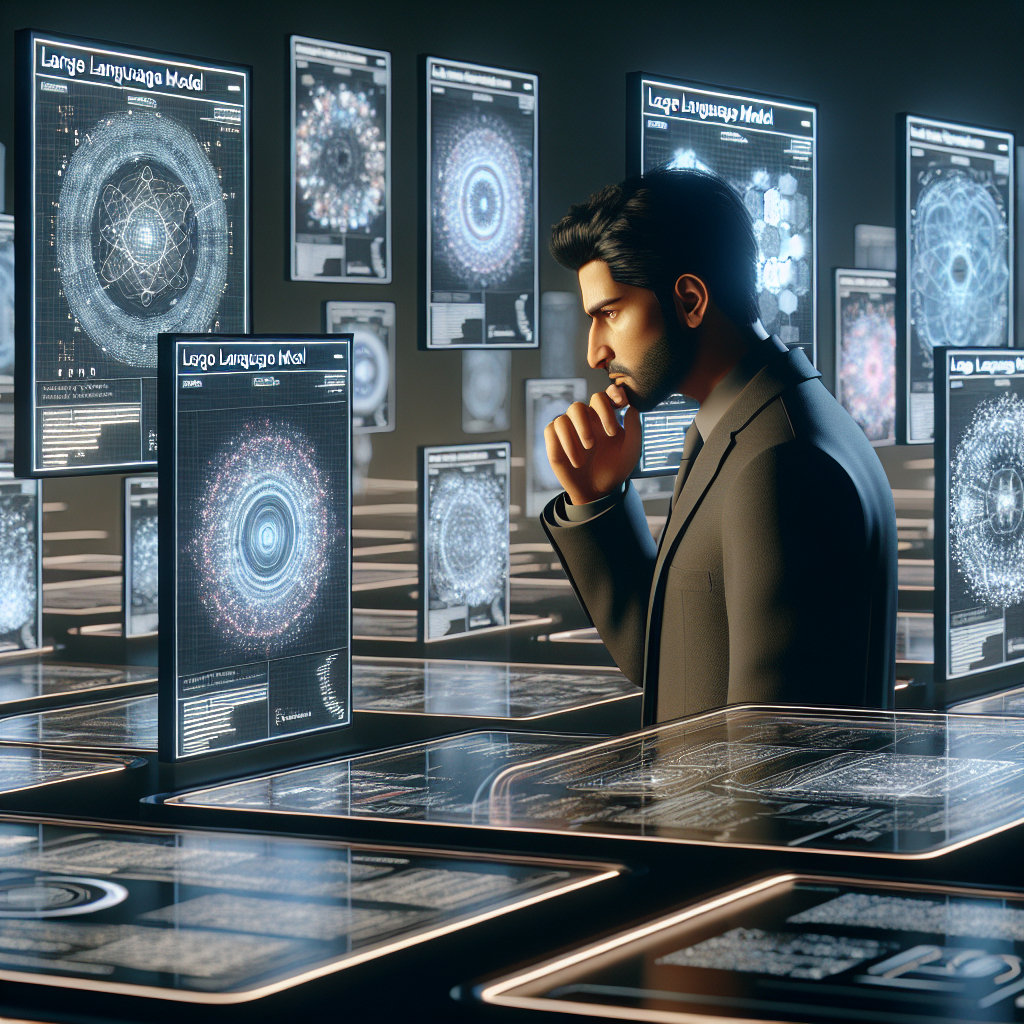

In [49]:
# And just to show you how easy it is: let's generate an image

from IPython.display import Image, display
import base64

response = openai.images.generate(
  model="dall-e-3",
  prompt="A photorealistic 3d image that illustrates someone choosing between a huge number of Large Language Models",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))

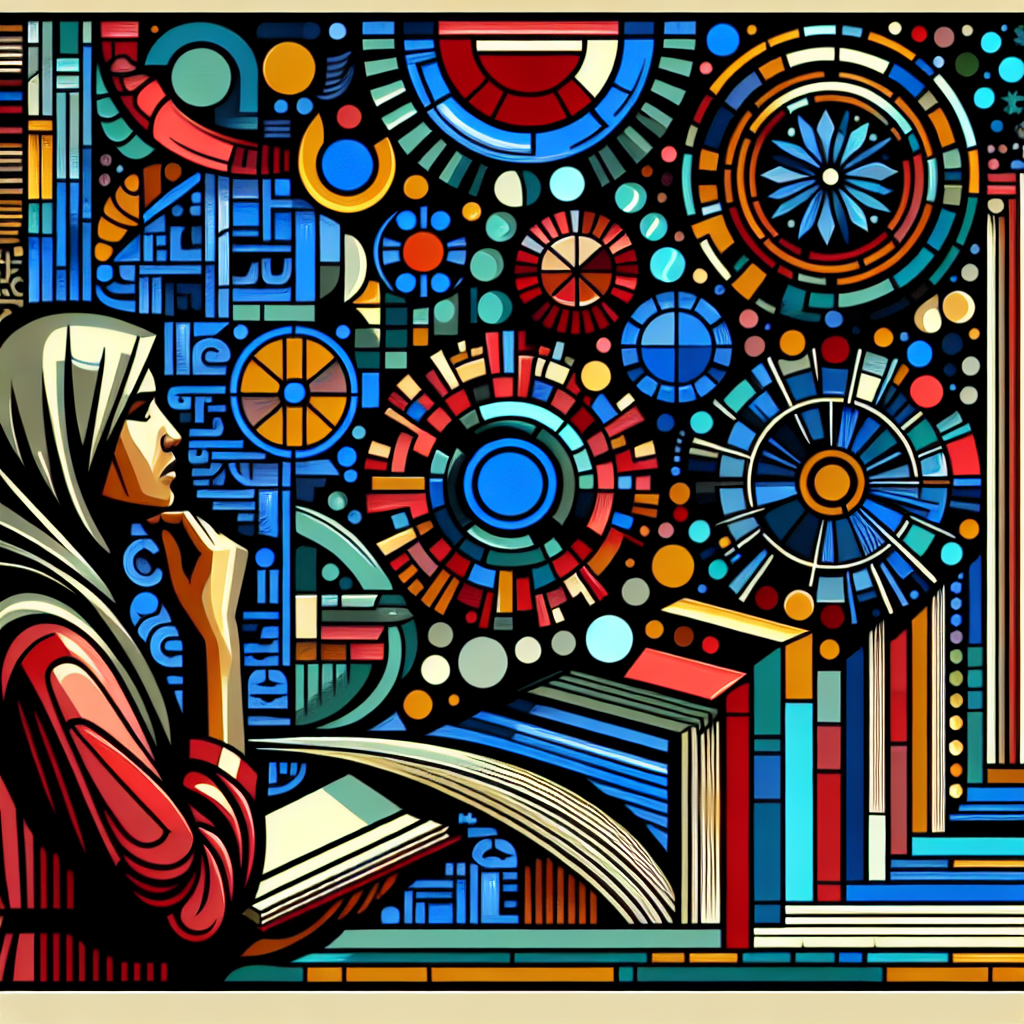

In [50]:
response = openai.images.generate(
  model="dall-e-3",
  prompt="An image that illustrates someone choosing between a huge number of Large Language Models in a vibrant pop-art style, like a Liechtenstein style, with dazzling lines and colors",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="b64_json"
)

# Extract the image data and display it
image_base64 = response.data[0].b64_json
image_data = base64.b64decode(image_base64)
display(Image(image_data))